In [32]:
!pip install tensorflow
import tensorflow as tf 

Defaulting to user installation because normal site-packages is not writeable


In [33]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle

In [34]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rCDDknd9dr3pnDhXTzR4")
project = rf.workspace("arunkumar-3cqnr").project("diabetes-tongue-classification")
version = project.version(1)
dataset = version.download("multiclass")

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...


In [35]:
datadir = "datasets"


CATEGORIES=["Diabetic","Non-Diabetic","Unlabeled"]


IMG_SIZE = 50

image_counts = {category: 0 for category in CATEGORIES}

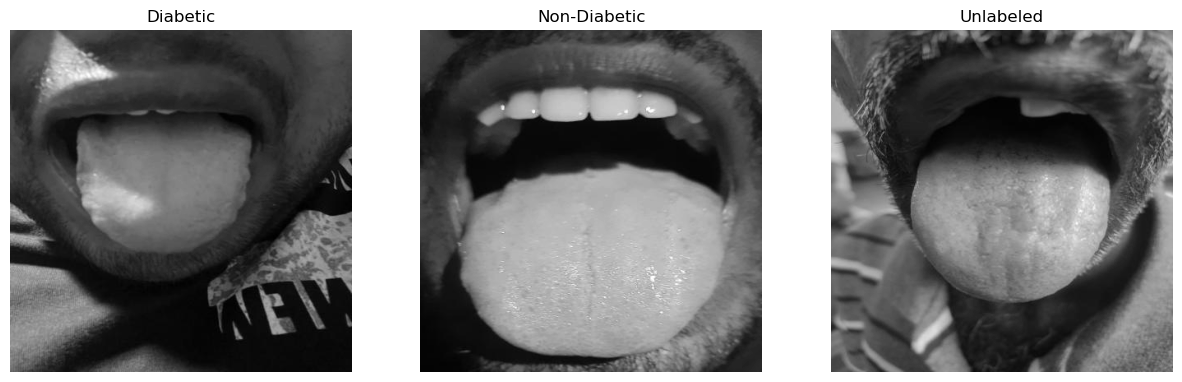

In [36]:
import os
import random
import cv2
import matplotlib.pyplot as plt

def show_sample_images():
    
    CATEGORIES = ['Diabetic', 'Non-Diabetic', 'Unlabeled']
    datadir = r"C:\Users\tanus\Downloads\Diabetes Tongue Classification.v1-tongue-dataset-v1.multiclass\test"
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, category in enumerate(CATEGORIES):
        path = os.path.join(datadir, category)
        image_name = random.choice(os.listdir(r"C:\Users\tanus\Downloads\Diabetes Tongue Classification.v1-tongue-dataset-v1.multiclass\test"))
        image_path = os.path.join(r"C:\Users\tanus\Downloads\Diabetes Tongue Classification.v1-tongue-dataset-v1.multiclass\test", image_name)
        
        
        image_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        
        if image_array is None:
            print(f"Failed to read image: {image_path}")
            continue
        
        
        axes[i].imshow(image_array, cmap='gray')
        axes[i].set_title(category)
        axes[i].axis('off')
    
    plt.show()


show_sample_images()


In [37]:
# Checking for all images in the data folder
for category in CATEGORIES :
    path = os.path.join(datadir, category)
    image_counts[category] = len(os.listdir(r"C:\Users\tanus\Downloads\Diabetes Tongue Classification.v1-tongue-dataset-v1.multiclass\test"))

    for img in os.listdir(r"C:\Users\tanus\Downloads\Diabetes Tongue Classification.v1-tongue-dataset-v1.multiclass\test"):
        img_array = cv2.imread(os.path.join(r"C:\Users\tanus\Downloads\Diabetes Tongue Classification.v1-tongue-dataset-v1.multiclass\test", img), cv2.IMREAD_GRAYSCALE)
        img_array = cv2.equalizeHist(img_array)

In [38]:
training_data = []
total_images = sum(image_counts.values())
print(f"Number of Images: A total of {total_images} images were used, with {image_counts['Diabetic']} images for Diabetic, {image_counts['Non-Diabetic']} images for Non-Diabetic, and {image_counts['Unlabeled']} images for Unlabeled.")


def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(datadir, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(r"C:\Users\tanus\Downloads\Diabetes Tongue Classification.v1-tongue-dataset-v1.multiclass\test"):
            try :
                img_array = cv2.imread(os.path.join(r"C:\Users\tanus\Downloads\Diabetes Tongue Classification.v1-tongue-dataset-v1.multiclass\test", img), cv2.IMREAD_GRAYSCALE) 
                img_array = cv2.equalizeHist(img_array)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

Number of Images: A total of 39 images were used, with 13 images for Diabetic, 13 images for Non-Diabetic, and 13 images for Unlabeled.


In [39]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [40]:
from tensorflow import keras

In [41]:
import tensorflow as tf 
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

In [42]:
X = X/255.0
y=np.array(y)

In [43]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


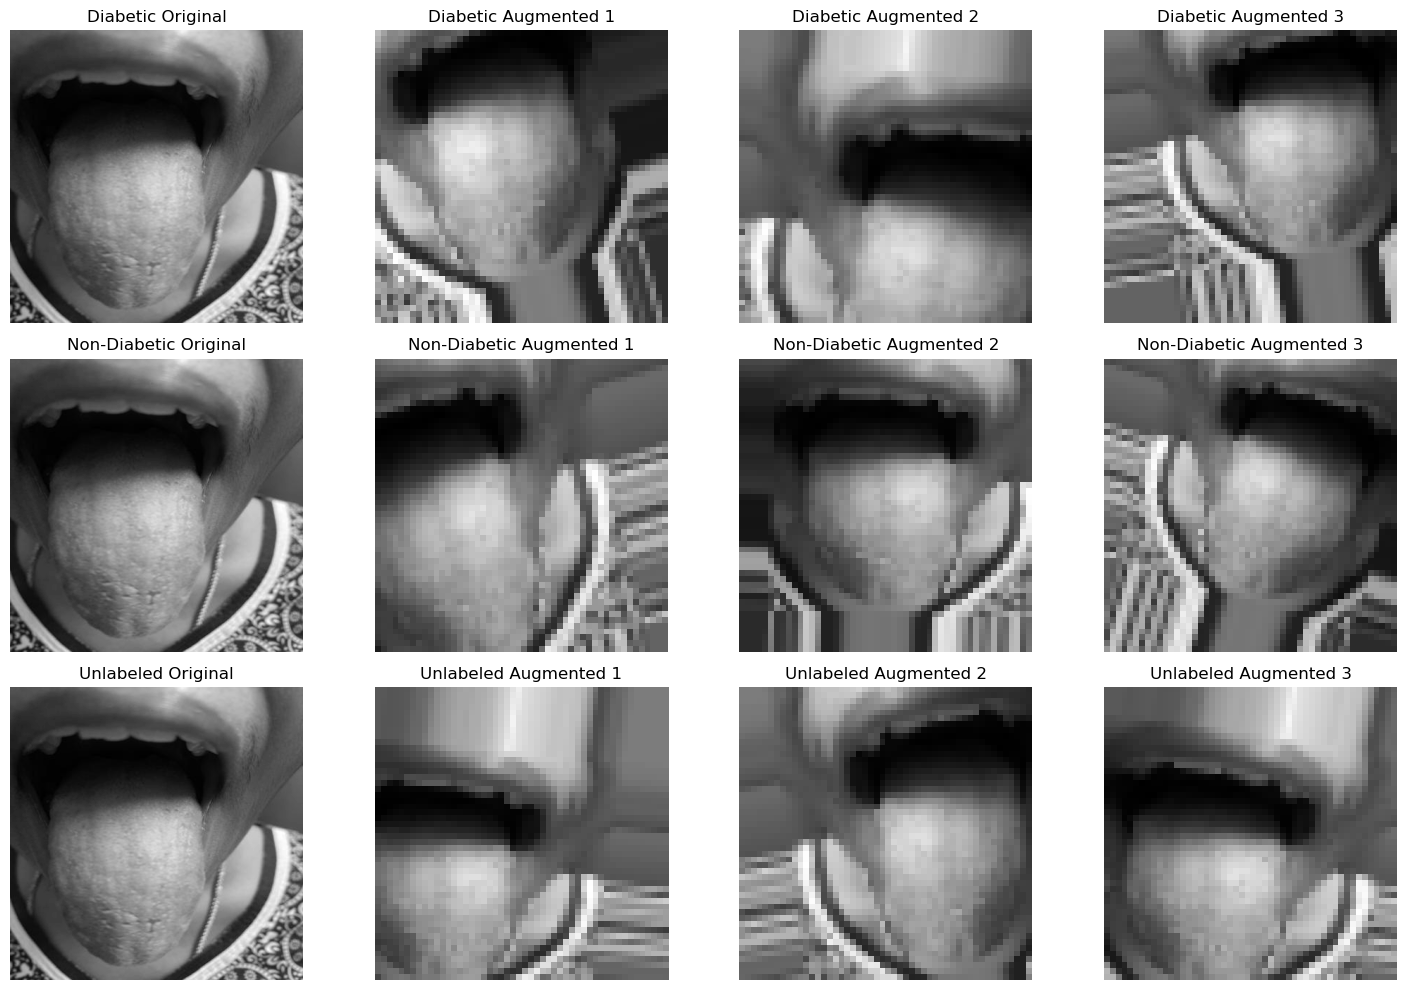

In [44]:
def show_sample_images():
    fig, axes = plt.subplots(3, 4, figsize=(15, 10))
    
    
    CATEGORIES = ["Diabetic", "Non-Diabetic", "Unlabeled"]
    datadir = "datasets"
    
    
    for i, category in enumerate(CATEGORIES):
        path = os.path.join(datadir, category)
        image_name = os.listdir(r"C:\Users\tanus\Downloads\Diabetes Tongue Classification.v1-tongue-dataset-v1.multiclass\test")[0]  # Take the first image for each category
        image_path = os.path.join(r"C:\Users\tanus\Downloads\Diabetes Tongue Classification.v1-tongue-dataset-v1.multiclass\test", image_name)
        image_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # original image
        axes[i, 0].imshow(image_array, cmap='gray')
        axes[i, 0].set_title(category + " Original")
        axes[i, 0].axis('off')
        
        #  data augmentation
        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )
        
        image_array = cv2.resize(image_array, (50, 50))
        image_array = np.expand_dims(image_array, axis=-1)  
        image_array = np.expand_dims(image_array, axis=0)   
        
        # Generate augmented images
        augmented_images = []
        for j, batch in enumerate(datagen.flow(image_array, batch_size=1)):
            #convert the augmented images from float to int
            augmented_image = batch[0].astype('uint8')
            #store the images
            augmented_images.append(augmented_image[:, :, 0])  
            
            # display augmented image
            axes[i, j + 1].imshow(augmented_image[:, :, 0], cmap='gray')
            axes[i, j + 1].set_title(f"{category} Augmented {j + 1}")
            axes[i, j + 1].axis('off')
            
            if j == 2:  # Show 3 augmented versions
                break
            
    plt.tight_layout()
    plt.show()

# Call the function to display the images
show_sample_images()

In [45]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler



X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

def lr_schedule(epoch):
    initial_lr = 0.001
    if epoch > 20:
        lr = initial_lr * 0.5e-3
    elif epoch > 10:
        lr = initial_lr * 1e-3
    else:
        lr = initial_lr
    print(f"Learning rate: {lr}")
    return lr

class_weights = {0: 1.0, 1: 1.0, 2: 1.0}


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation("softmax"))


model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


model.summary()

train_data = datagen.flow(X_train, y_train, batch_size=32)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=64, callbacks=[reduce_lr, early_stopping, model_checkpoint, lr_scheduler], class_weight=class_weights)


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 22, 22, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 9, 9, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           1,539 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,146,243 (4.37 MB)

 Trainable params: 1,144,771 (4.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

Learning rate: 0.001
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4375 - loss: 9.5638 - val_accuracy: 0.2500 - val_loss: 9.2222 - learning_rate: 0.0010
Learning rate: 0.001
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.3750 - loss: 9.6414 - val_accuracy: 0.0000e+00 - val_loss: 9.1665 - learning_rate: 0.0010
Learning rate: 0.001
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.2188 - loss: 9.7853 - val_accuracy: 0.2500 - val_loss: 9.1183 - learning_rate: 0.0010
Learning rate: 0.001
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.2500 - loss: 9.6026 - val_accuracy: 0.2500 - val_loss: 9.0700 - learning_rate: 0.0010
Learning rate: 0.001
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.4062 - loss: 9.1759 - val_accuracy: 0.0000e+00 - val_loss: 9.0192 - learning_rate: 0.0010
Learning rate: 0.001
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.3750 - loss: 9.4420 - val_accuracy: 0.0000e+00 - val_lo

In [46]:
from sklearn.metrics import confusion_matrix


In [47]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
 json_file.write(model_json)

model.save_weights("model.weights.h5")
print("Saved model to disk")

model.save('CNN.h5') #HDF5

Saved model to disk


In [48]:
# Printing a graph showing the accuracy changes during the training phase
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
acc=np.array(acc)
val_acc=np.array(val_acc)
loss=np.array(loss)
val_loss=np.array(val_loss)
epochs_range = range(len(acc))

Text(0.5, 0, 'epoch')

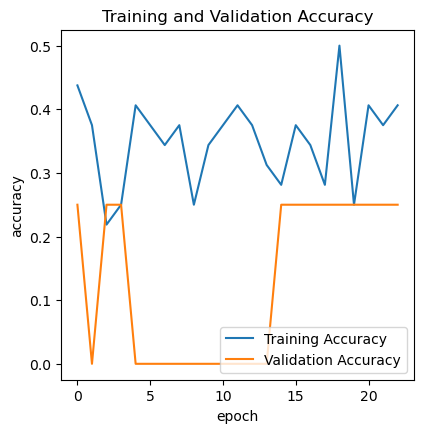

In [49]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

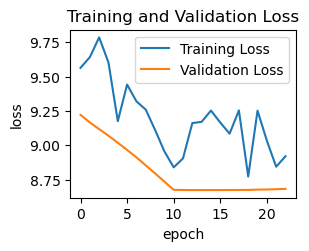

In [50]:
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [51]:
# Training and Validation Accuracy in Percentage
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print(f"Training Accuracy: {train_accuracy[-1] * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy[-1] * 100:.2f}%")

Training Accuracy: 40.62%
Validation Accuracy: 25.00%


In [52]:
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Unique values in y_val: {np.unique(y_val)}")

Shape of X_val: (4, 50, 50, 1)
Shape of y_val: (4,)
Unique values in y_val: [0 1 2]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predictions: [1 1 2 2]
Actual Labels: [2 0 1 0]


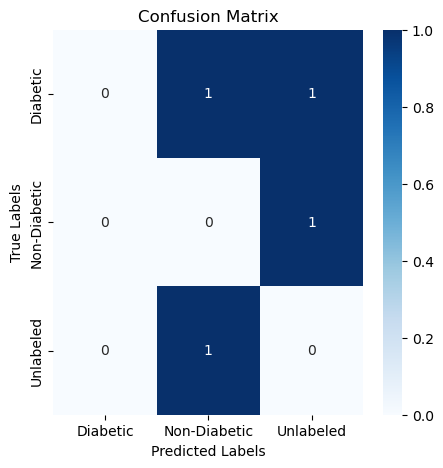

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print some predictions and actual labels
print("Predictions:", y_pred_classes[:10])
print("Actual Labels:", y_val[:10])

conf_matrix = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from keras.models import load_model
from tkinter import *
import tkinter.messagebox
import PIL.Image
import PIL.ImageTk
from tkinter import filedialog

CATEGORIES=["Diabetic","Non-Diabetic","Unlabeled"]

In [61]:
root = Tk()
root.title("Diabetes Detection")
root.state('zoomed')
root.configure(bg='#D3D3D3')
root.resizable(width = True, height = True) 
value = StringVar()
panel = Label(root)
model = tf.keras.models.load_model("CNN.h5")

In [62]:
def prepare(file):
    IMG_SIZE = 50
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img_array = cv2.equalizeHist(img_array)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
def detect(filename):
    prediction = model.predict(prepare(filename))
    prediction = list(prediction[0])
    print(prediction)
    l=CATEGORIES[prediction.index(max(prediction))]
    print(CATEGORIES[prediction.index(max(prediction))])
    value.set(CATEGORIES[prediction.index(max(prediction))])
    i=int(prediction.index(max(prediction)))

In [63]:
def ClickAction(event=None):
    filename = filedialog.askopenfilename()
    img = PIL.Image.open(filename)
    img = img.resize((250,250))
    img = PIL.ImageTk.PhotoImage(img)
    global panel
    panel = Label(root, image = img)
    panel.image = img
    panel = panel.place(relx=0.435,rely=0.3)
    detect(filename)

In [64]:
PLACEHOLDER = Label(root, text="Click here to choose an image", font=(None, 18), bg='grey', width=30, height=10)
PLACEHOLDER.place(relx=0.4, rely=0.3)
PLACEHOLDER.bind("<Button-1>", lambda event: ClickAction())
result = Label(root, textvariable=value, font=(None, 20))
result = result.place(relx=0.465,rely=0.7)
root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
[1.5650274e-29, 1.0, 2.0162044e-32]
Non-Diabetic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[9.342741e-31, 1.0, 7.7764316e-31]
Non-Diabetic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[7.777848e-33, 1.0, 1.7284787e-37]
Non-Diabetic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[1.3885655e-28, 1.0, 1.6246844e-30]
Non-Diabetic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[1.3957734e-26, 1.0, 3.1478646e-31]
Non-Diabetic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[1.1307402e-28, 1.0, 4.2265784e-27]
Non-Diabetic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[1.1233101e-30, 1.0, 1.3780346e-33]
Non-Diabetic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[2.0188081e-30, 1.0, 1.4677688e-30]
Non-Diabetic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[6.3345605e-29, 1.0, 8.102177e-30]
Non-Diabetic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[1.9210827e-31, 1.0, 2.0742242e-31]
Non-Diabetic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[1.8729586e-27, 1.0, 2.2104396e-35]
Non-Diabetic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[1.4274

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\PIL\Image.py", line 3231, in open
    fp.seek(0)
    ^^^^^^^
AttributeError: 'str' object has no attribute 'seek'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\tanus\AppData\Local\Temp\ipykernel_18692\506190040.py", line 3, in <lambda>
    PLACEHOLDER.bind("<Button-1>", lambda event: ClickAction())
                                                 ^^^^^^^^^^^^^
  File "C:\Users\tanus\AppData\Local\Temp\ipykernel_18692\1927036886.py", line 3, in ClickAction
    img = PIL.Image.open(filename)
          ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\PIL\Image.py", line 3233, in open
    fp = io.BytesIO(fp.read())
                    ^^^^